In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Install Kaggle
# !pip install -q kaggle

In [ ]:
# from google.colab  import files
# files.upload()

In [ ]:
#Create the kaggle Folder
# !mkdir ~/.kaggle

In [ ]:
#Copy the kaggle.json to folder created
# ! cp kaggle.json ~/.kaggle/ 

In [ ]:
#Permission for  the json to act
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle datasets download -d imdadulhaque1/vegetabledataset

In [ ]:
# from zipfile import ZipFile
# file_name = "vegetabledataset.zip"
 
# with ZipFile(file_name, 'r') as zip:
#   zip.extractall()
#   print("Data folder is successfully unzipped !")

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Set the paths to your image data directories
train_dir = '/content/Vegetable_Dataset/Training'
test_dir = '/content/Vegetable_Dataset/Testing'
val_dir = '/content/Vegetable_Dataset/Validation'

In [ ]:
# Set the hyperparameters for image preprocessing
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# Define an ImageDataGenerator for each dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load the image data using the flow_from_directory method
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2771 images belonging to 6 classes.
Found 1894 images belonging to 6 classes.
Found 973 images belonging to 6 classes.


In [ ]:
# Load the labels for the validation dataset
val_labels = np.array([0] * 100 + [1] * 100 + [2] * 100 + [3]*100 + [4]*100 + [5]*100)
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [ ]:
MobileNetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# # Define the MobileNetV2 model
# MobileNetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

x = MobileNetV2.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=MobileNetV2.input, outputs=predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
87/87 [==============================] - 861s 10s/step - loss: 0.3157 - accuracy: 0.9184 - val_loss: 10.9755 - val_accuracy: 0.2682
Epoch 2/20
87/87 [==============================] - 834s 10s/step - loss: 0.1309 - accuracy: 0.9646 - val_loss: 15.2836 - val_accuracy: 0.2312
Epoch 3/20
87/87 [==============================] - 835s 10s/step - loss: 0.1500 - accuracy: 0.9610 - val_loss: 6.0243 - val_accuracy: 0.7174
Epoch 4/20
87/87 [==============================] - 840s 10s/step - loss: 0.1021 - accuracy: 0.9729 - val_loss: 21.4553 - val_accuracy: 0.3947
Epoch 5/20
87/87 [==============================] - 818s 9s/step - loss: 0.0503 - accuracy: 0.9852 - val_loss: 7.7833 - val_accuracy: 0.5293
Epoch 6/20
87/87 [==============================] - 898s 10s/step - loss: 0.1274 - accuracy: 0.9704 - val_loss: 9.6371 - val_accuracy: 0.3628
Epoch 7/20
87/87 [==============================] - 851s 10s/step - loss: 0.0506 - accuracy: 0.9870 - val_loss: 9.5752 - val_accuracy: 0.4913
Epoc

In [ ]:
model.save("/content/drive/MyDrive/SavedModel/Vegetable_MobileNetV2.h5")

In [ ]:
# Evaluate the model on the test data
y_true = test_data.classes
y_pred = model.predict(test_data)

60/60 [==============================] - 286s 5s/step


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)  # convert probabilities to class labels
y_true_classes = test_data.classes  # true class labels for the test data

# calculate the overall accuracy
accuracy = np.mean(y_pred_classes == y_true_classes)
print(f'Overall accuracy: {accuracy:.2%}')


# Compute precision, recall, and F1 score for each class
from sklearn.metrics import classification_report
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
overall_precision = report['macro avg']['precision']
overall_recall = report['macro avg']['recall']
overall_f1_score = report['macro avg']['f1-score']
print(f"Overall precision: {overall_precision:.2f}")
print(f"Overall recall: {overall_recall:.2f}")
print(f"Overall F1 score: {overall_f1_score:.2f}")

import numpy as np
from sklearn.metrics import roc_auc_score

# Compute AUC score
overall_auc = roc_auc_score(y_true, y_pred, multi_class='ovr')

print("Overall AUC score:", overall_auc)

Overall accuracy: 39.92%
Overall precision: 0.35
Overall recall: 0.31
Overall F1 score: 0.28
Overall AUC score: 0.8209338010577145


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


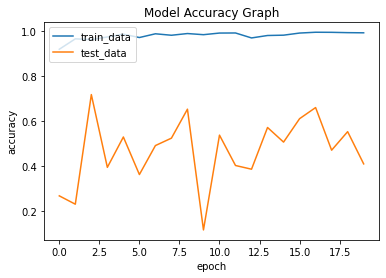

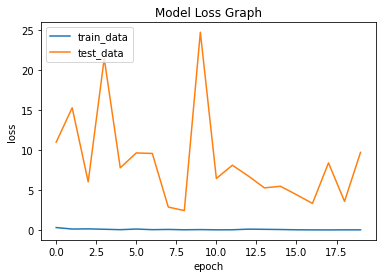

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy Graph")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_data', 'test_data'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss Graph")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_data', 'test_data'], loc='upper left')
plt.show()

In [ ]:
# Compute the ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(test_data.num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

<function matplotlib.pyplot.show(close=None, block=None)>

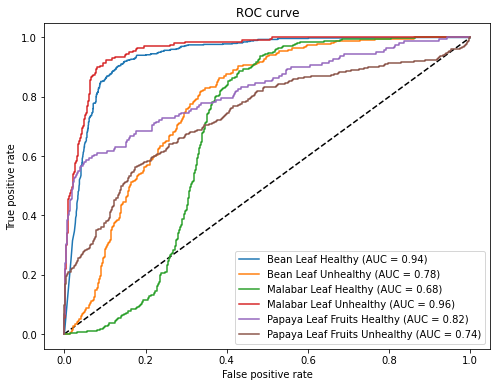

In [ ]:
# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(test_data.num_classes):
  if( i == 0):
      plt.plot(fpr[i], tpr[i], label=f'Bean Leaf Healthy (AUC = {roc_auc[i]:.2f})')
  if( i == 1):
      plt.plot(fpr[i], tpr[i], label=f'Bean Leaf Unhealthy (AUC = {roc_auc[i]:.2f})')
  if( i == 2):
      plt.plot(fpr[i], tpr[i], label=f'Malabar Leaf Healthy (AUC = {roc_auc[i]:.2f})')
  if( i == 3):
      plt.plot(fpr[i], tpr[i], label=f'Malabar Leaf Unhealthy (AUC = {roc_auc[i]:.2f})')
  if( i == 4):
      plt.plot(fpr[i], tpr[i], label=f'Papaya Leaf Fruits Healthy (AUC = {roc_auc[i]:.2f})')
  if( i == 5):
      plt.plot(fpr[i], tpr[i], label=f'Papaya Leaf Fruits Unhealthy (AUC = {roc_auc[i]:.2f})')
    # plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show

In [ ]:
import numpy as np
from sklearn import metrics

predictions = model.predict_generator(test_data)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test_data.classes
class_labels = ['BL_Healthy', 'BL_Unhealthy', 'ML_Healthy', 'ML_Unhealthy', 'PLF_Healthy', 'PLF_Unhealthy']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['BL_Healthy', 'BL_Unhealthy', 'ML_Healthy', 'ML_Unhealthy', 'PLF_Healthy', 'PLF_Unhealthy']],
                  columns = [i for i in ['BL_Healthy', 'BL_Unhealthy', 'ML_Healthy', 'ML_Unhealthy', 'PLF_Healthy', 'PLF_Unhealthy']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

In [2]:
from tensorflow.keras.models import load_model
Vegetable_MobileNetV2 = load_model("/content/drive/MyDrive/SavedModel/Vegetable_MobileNetV2.h5")